# Исследование для интернет-магазина «Стримчик»

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цели исследования:**

1) **Составить портрет пользователя каждого региона.**
- Определить для пользователя каждого региона (NA, EU, JP):
- Определить самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Определить самые популярные жанры (топ-5). Пояснить разницу.
- Выяснить, влияет ли рейтинг ESRB на продажи в отдельном регионе?

2) **Проверить гипотезы.**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Ход исследования**

Данные о продажах игр я получу из файла `/datasets/games.csv` . 0 качестве данных ничего не известно. Поэтому перед тем
как приступать к целям исследования, понадобится обзор данных. Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее приступлю к проведениюисследовательского анализа.
 Таким образом, моё исследование пройдёт в семь этапов:
- Обзор данных.
- Предобработка данных.
- Расчеты и добавление результатов в таблицу.
- Составить портрет пользователя каждого региона.
- Проверка гипотиз.
- Написание общего вывода

## Открыть файл с данными и изучить общую информацию.

In [1]:
# Ипортируем необходисмые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
#import warnings
#warnings.filterwarnings("ignore")
#plt.style.use('ggplot')

In [2]:
# Создадим словарь и полезные функции для предобработки данных


# Словарь с описанием столбцов
dict_df ={
    'name': 'название игры',
    'platform': 'платформа',
    'year_of_release': 'год выпуска',
    'genre': 'жанр',
    'na_sales': 'продажи в Северной Америке (млн копий)',
    'eu_sales': 'продажи в Европе (млн копий)',
    'jp_sales': 'продажи в Японии (млн копий)',
    'other_sales': 'продажи в других странах (млн копий)',
    'critic_score': 'оценка критиков (максимум 100)',
    'user_score': 'оценка пользователей (максимум 10)',
    'rating': 'рейтинг ESRB'
}

# Переведём в датафрейм
dict_name = pd.Series(dict_df)


# Переведём в датафрейм
dict_name = pd.Series(dict_df)

# Для удобства дальнейшей работы, создадим функцию, которая будет возвращать нам всю необходимую информацию по значениям столбца.
def col_info(column_name):
    print('Колонка:', column_name, '-', dict_name[column_name])
    print('Тип данных:', df[column_name].dtypes)
    print('Количество пропусков:', df[column_name].isna().sum())
    
    if df[column_name].dtypes != 'object':
        print('Mинимальное значение:', df[column_name].min(), '\n' 'Максимальное значение:', df[column_name].max())
        print()
        print('Топ 10 максимальных значений:', '\n', df[column_name].sort_values(ascending=False).head(10))
        print()
        print('Топ 10 минимальных значений:', '\n', df[column_name].sort_values(ascending=True).head(10))
    
    print()
    print('Список уникальных значений:', '\n', df[column_name].value_counts(dropna = False))
    print()
    print('Количество уникальных значений:', len(df[column_name].unique()))
    print()
    if df[column_name].dtypes == 'object':
        print('Количество дубликатов', df[column_name].duplicated().sum())


## Обзор и предобработка данных.

### Обзор данных.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


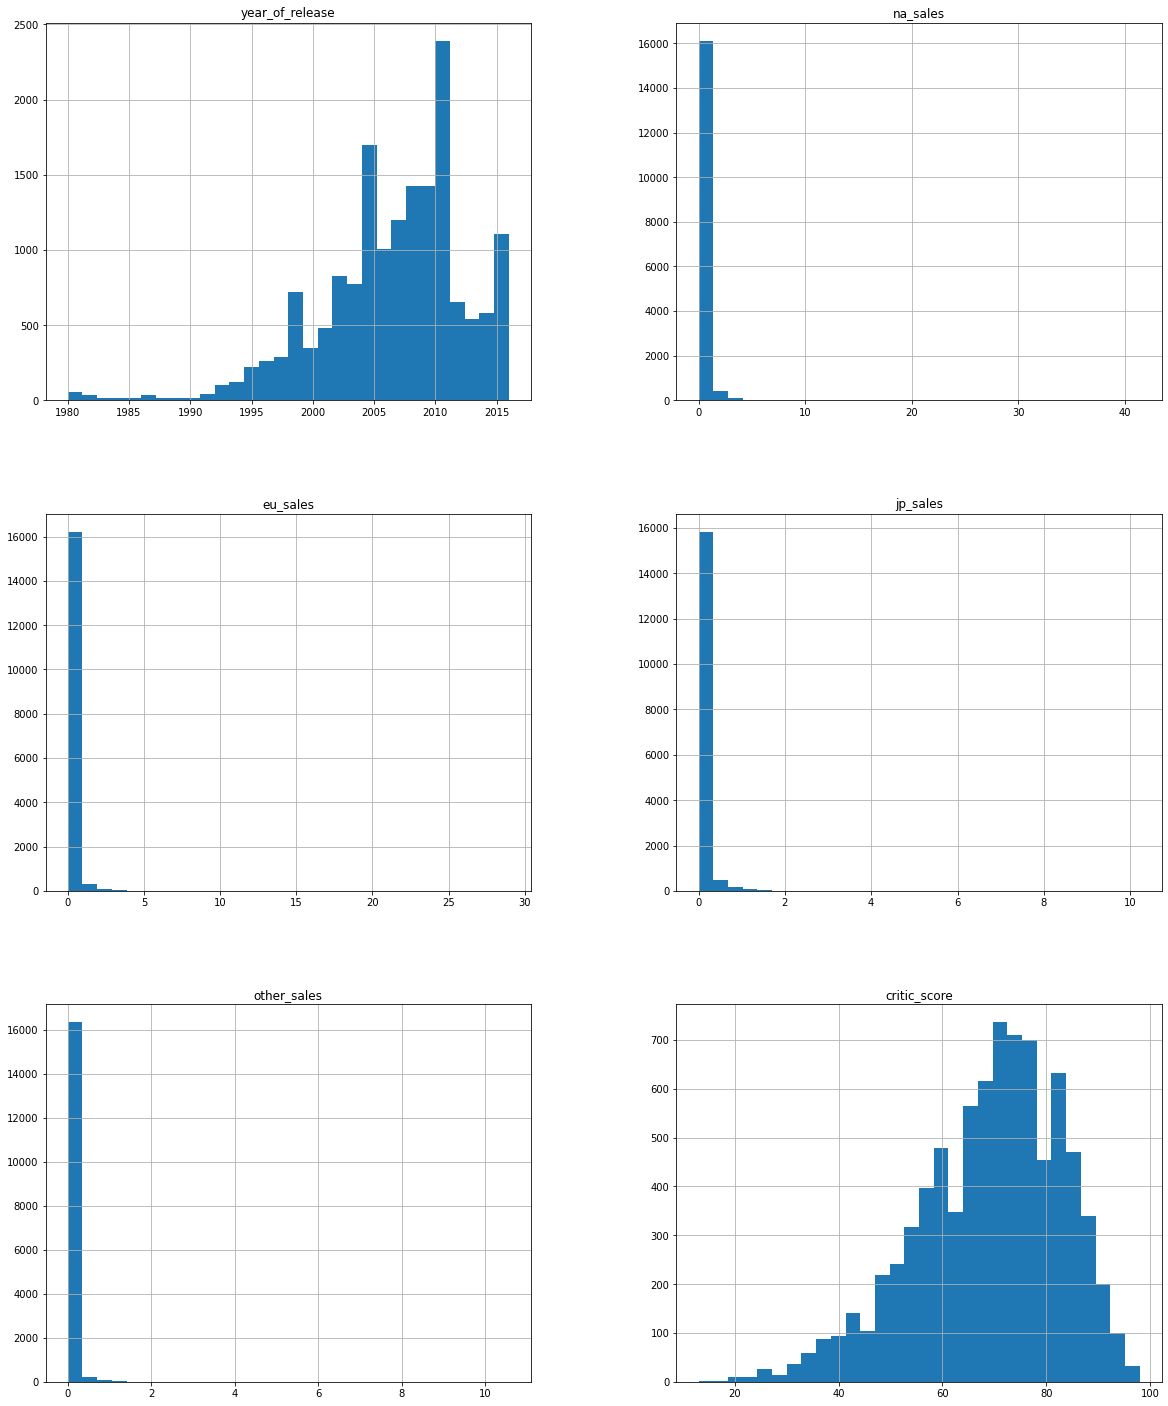

In [3]:
#Считываем датасет и записываем в переменную `df`
df = pd.read_csv('/datasets/games.csv')
#Сразу приведём столбцы к нижнемк регистру
df.columns = df.columns.str.lower()

#Взглянем на первые 15 строчек датафрейма для дальнейшей проверки соответствия типу данных.
display(df.head(15))

#Построим общую гистограмму для всех числовых столбцов таблицы.
print()
df.hist(bins = 30, figsize=(20, 25), grid = True)
print()
#Посмотрим на основную информацию датафрейма с помощью метода info.
df.info()
print()
#Посмотрим на статистические данные, которые дают представление о распределении значений.
df.describe()

In [4]:
# Смотрим процент пропусков от всего датасета
pd.DataFrame(round((df.isna().mean()*100),2).sort_values(ascending=False), columns=['NaN, %']).style.format(
    '{:.2f}').background_gradient('coolwarm')

,"NaN, %"
critic_score,51.32
rating,40.48
user_score,40.09
year_of_release,1.61
name,0.01
genre,0.01
platform,0.00
na_sales,0.00
eu_sales,0.00
jp_sales,0.00


In [5]:
#Проверим наличие явных дубликатов
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


In [6]:
# Проверим наличие неявных дубликатов в столбце name
print('Количество неявных дубликатов name:',df.duplicated(subset='name').sum())

Количество неявных дубликатов name: 5155


Для наглядности, запишем, какую информацию несёт в себе колонка.

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
        *Данные за 2016 год могут быть неполными.*

**Вывод:**


- В датафрейме содержится 16,715 записей и 11 столбцов с различными атрибутами, такими как название игры, платформа, год выпуска, жанр, продажи в разных регионах, оценки критиков, оценки пользователей и рейтинг.


- В столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating` есть пропущенные значения, что указывает на неполноту данных. Нам потребуется дополнительная предобработка, чтобы заполнить эти пропуски или удалить строки с неполными данными.

- В данных есть разные типы данных: числовые `float64` и категориальные `object`. Столбцы с числовыми данными включают год выпуска и продажи, а категориальные данные содержатся в столбцах с названиями игр, платформами, жанрами и рейтингами.

- В столбце 'user_score' наблюдается тип данных 'object', хотя он должен быть числовым. Возможно, данные содержат нечисловые символы или формат записи чисел отличается. Необходимо преобразовать тип данных этого столбца в числовой для корректного анализа.


- Основная доля продаж в Северной Америке и Европы приходится на игры с тиражом до 3-5 млн копий. В Японии и остальных странах большую часть продаж состовляет

**В формат `int` из формата `float`:**

- `Year_of_Release`

**В формат `float` из формата `object`:**

- `User_Score`


### Преобразование типов данных и заполнение пропусков.

#### Столбцы `name, genre`

In [7]:
# Незначительные пропуски в некоторых столбцах мы не можем восстановить, удаляем этим строки полностью.
#df = df.dropna(subset=['name', 'genre', 'year_of_release'])

In [8]:
# Ещё раз смотрим на количество пропусков в колонках name, genre, year_of_release
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# 4 строчки из name & genre удаляем смело 
df = df.dropna(subset=['name', 'genre'])

#### Столбец `year_of_release`.

In [10]:
df.query('year_of_release.isna()').sample(20,random_state=42)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2453,The Lord of the Rings: War in the North,X360,NaN,Action,0.52,0.24,0.00,0.08,61.0,7.4,M
7391,Valkyria Chronicles III: Unrecorded Chronicles,PSP,NaN,Strategy,0.00,0.00,0.21,0.00,NaN,NaN,NaN
5624,Singularity,X360,NaN,Shooter,0.24,0.05,0.00,0.02,76.0,7.7,M
8197,NBA Starting Five,PS2,NaN,Sports,0.09,0.07,0.00,0.02,53.0,7.3,E
12217,Rayman Arena,XB,NaN,Racing,0.05,0.01,0.00,0.00,50.0,tbd,E
8740,Home Run,2600,NaN,Sports,0.14,0.01,0.00,0.00,NaN,NaN,NaN
12959,Mountain Bike Adrenaline,PS2,NaN,Sports,0.03,0.02,0.00,0.01,NaN,tbd,E
3352,The Golden Compass,Wii,NaN,Action,0.26,0.28,0.00,0.07,35.0,6.8,E10+
11338,Charm Girls Club: My Fashion Show,DS,NaN,Simulation,0.08,0.00,0.00,0.01,NaN,tbd,E
15119,Legacy of Ys: Books I & II,DS,NaN,Role-Playing,0.02,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df.query('year_of_release.isna()').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [12]:
# Частичное восстановление пропущенных значений столбца year_of_release
print('Пропусков до обработки:', df.year_of_release.isna().sum())
# Функция для заполнения пропущенных значений в столбце 'year_of_release'
def fill_missing_year(row, name_year_dict):
    if pd.isnull(row['year_of_release']):
        if row['name'] in name_year_dict:
            return name_year_dict[row['name']]
    return row['year_of_release']

# Создание словаря с уникальными именами игр и их годами выпуска (без NaN)
name_year_dict = df[df['year_of_release'].notna()].drop_duplicates(subset='name').set_index('name')['year_of_release'].to_dict()

# Заполнение пропущенных значений в столбце 'year_of_release'
df['year_of_release'] = df.apply(lambda row: fill_missing_year(row, name_year_dict), axis=1)

print('Пропусков после обработки:', df.year_of_release.isna().sum())

Пропусков до обработки: 269
Пропусков после обработки: 146


In [13]:
df.query('year_of_release.isna()').sample(20,random_state=42)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6299,Flag Capture,2600,NaN,Action,0.25,0.02,0.00,0.00,NaN,NaN,NaN
12209,Build-A-Bear Workshop: Friendship Valley,Wii,NaN,Misc,0.06,0.00,0.00,0.00,NaN,tbd,E
4635,NHL Slapshot,Wii,NaN,Sports,0.39,0.00,0.00,0.02,76.0,8.1,E
3883,Fishing Derby,2600,NaN,Sports,0.48,0.03,0.00,0.01,NaN,NaN,NaN
6255,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,0.00,0.00,0.27,0.01,NaN,NaN,NaN
14449,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
8680,Jurassic Park: The Game,X360,NaN,Action,0.15,0.00,0.00,0.01,60.0,3.6,T
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+


Оставшиеся пропуски столбца year_of_release в основном остались для игр которые выходили на старых и не актуальных платформах, в рамках нашего исследования можно отказаться от этих строк.

In [14]:
df = df.dropna(subset = ['year_of_release'])

#### Столбец `user_score`.


In [15]:
# Посмотрим на уникальные значение столбца 'user_score'
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Чтобы убрать значение `tbd` из столбца `user_score` и перенести его в качестве булевого значения в новый столбец, нужно выполнить следующие действия:

In [16]:
# Создадим новый столбец с именем 'is_tbd', используя метод .apply() с lambda-функцией, которая проверяет, 
# равно ли значение в столбце 'user_score' строке 'tbd'. 
# Если значение равно 'tbd', то функция вернет True, в противном случае - False.

df['is_tbd'] = df['user_score'].apply(lambda x: x == 'tbd')

# Заполним значение `tbd` на NaN и преобразуем тип данных столбца 'user_score' в числовой с помощью метода .astype()
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [17]:
col_info('user_score')
display(df[df.user_score.isna()])

Колонка: user_score - оценка пользователей (максимум 10)
Тип данных: float64
Количество пропусков: 9027
Mинимальное значение: 0.0 
Максимальное значение: 9.7

Топ 10 максимальных значений: 
 14412    9.7
3417     9.6
8975     9.6
16546    9.5
10105    9.5
5920     9.5
16627    9.5
1645     9.5
712      9.4
146      9.4
Name: user_score, dtype: float64

Топ 10 минимальных значений: 
 2835     0.0
13682    0.2
9970     0.2
13380    0.3
5764     0.3
9147     0.5
10262    0.5
10482    0.6
15217    0.6
13426    0.7
Name: user_score, dtype: float64

Список уникальных значений: 
 NaN    9027
7.8     324
8.0     288
8.2     279
8.3     253
       ... 
1.0       2
1.5       2
9.6       2
0.0       1
9.7       1
Name: user_score, Length: 96, dtype: int64

Количество уникальных значений: 96



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,False
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,False
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,False
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,False


Так же, как и с `critic_score`, количество пропущенных значений велико, и их восстановление невозможно. Вместо этого мы установим заполнитель "-1".

In [18]:
df.user_score = df.user_score.fillna(-1)

In [19]:
# year_of_release переводим в int
df['year_of_release'] = df['year_of_release'].astype(int)

#### Столбец `rating`.

In [20]:
col_info('rating')
display(df[df.rating.isna()])

Колонка: rating - рейтинг ESRB
Тип данных: object
Количество пропусков: 6699

Список уникальных значений: 
 NaN     6699
E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Количество уникальных значений: 9

Количество дубликатов 16558


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,False
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN,False
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN,False
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,False
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN,False
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,False
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN,False


Заметно, что отсутствующие значения в столбце `rating` часто сопровождаются пропусками в столбцах `critic_score` и `user_score`. Наличие пропусков не зависит от возраста игры, платформы, на которой она доступна, или жанра. Мы не можем удалить строки с пропусками, поскольку они составляют почти половину набора данных. В данной ситуации следует использовать заполнитель для отсутствующих значений.

Так же надо обратить внимание на рейтинги которые упоминаются редко. 
Проведя некоторые исследования в сети, можно получить определения для указанных рейтингов.
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех» 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- K-A - старый вариант маркировки E (for everyone)

In [21]:
df.rating = df.rating.fillna('Unknown')
df.rating = df.rating.replace({'RP': 'Unknown', 'K-A': 'E', 'AO': 'M'})
df.rating.value_counts()

Unknown    6701
E          3961
T          2930
M          1555
E10+       1412
EC            8
Name: rating, dtype: int64

Для получения рейтинга издатель отправляет видеоматериалы, демонстрирующие самые яркие и экстремальные моменты игры, в ESRB. Кроме того, издатель предоставляет анкету с информацией о содержании игры. Вероятно, некоторые разработчики игр не считали необходимым обращаться в негосударственную организацию для оценки своего продукта, поэтому не все игры имеют рейтинг в столбце rating.

#### Столбец `critic_score`. 

In [22]:
col_info('critic_score')
display(df[df.critic_score.isna()])

Колонка: critic_score - оценка критиков (максимум 100)
Тип данных: float64
Количество пропусков: 8492
Mинимальное значение: 13.0 
Максимальное значение: 98.0

Топ 10 максимальных значений: 
 5350    98.0
227     98.0
57      98.0
51      98.0
97      97.0
517     97.0
49      97.0
129     97.0
42      97.0
38      97.0
Name: critic_score, dtype: float64

Топ 10 минимальных значений: 
 13689    13.0
10662    17.0
15343    19.0
12822    19.0
10015    19.0
12131    19.0
9105     19.0
7218     19.0
1050     20.0
11442    20.0
Name: critic_score, dtype: float64

Список уникальных значений: 
 NaN     8492
70.0     253
71.0     252
75.0     243
78.0     238
        ... 
20.0       3
29.0       3
21.0       1
17.0       1
13.0       1
Name: critic_score, Length: 82, dtype: int64

Количество уникальных значений: 82



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,Unknown,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,Unknown,False
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,Unknown,False
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,Unknown,False
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,Unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,Unknown,False
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,Unknown,False
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,Unknown,False
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,Unknown,False


Аналогично ситуации с `rating`, в случае с пропущенными значениями здесь их слишком много, и восстановление невозможно. Мы установим заполнитель "-1", так как нам необходимы данные типа `float` для дальнейшего анализа, а отрицательные рейтинги отсутствуют. Таким образом, мы сможем легко определить пропущенные значения.

In [23]:
df.critic_score = df.critic_score.fillna(-1)

In [24]:
# Проверим пропуски после всех операций
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


#### Добалвяем столбец `total_sales`. 

In [25]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.query('total_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,-1.0,-1.0,Unknown,False,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,-1.0,-1.0,Unknown,False,0.0


In [26]:
# Удалим строки в которых значения total_sales == 0
df = df.loc[df['total_sales'] != 0]

**Вывод:**

- Привел названия столбцов к нижнему регистру, преобразовал данные в соответствующие типы.
- Описал столбцы, в которых изменил тип данных, и объяснил причины.
- Обработал пропуски и объяснил выбор метода заполнения пропусков или причины, по которым не стал их заполнять.
- Рассмотрел возможные причины возникновения пропусков.
- Подсчитал общий объем продаж во всех регионах и добавил эту информацию в новый столбец.

## Исследовательский анализ данных.

### Динамика выпуска игр по годам. 

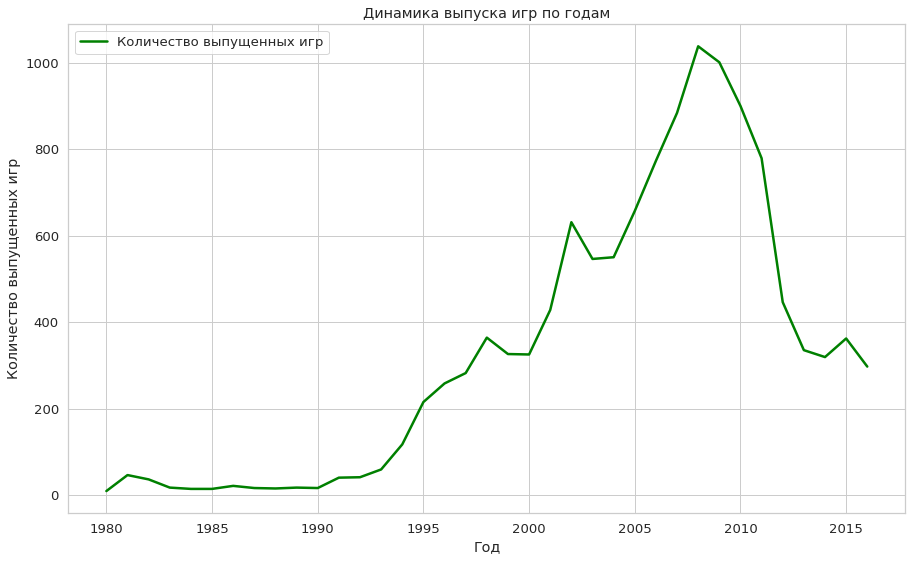

In [27]:
unique_games = df.drop_duplicates(subset=['name', 'year_of_release'])
schedule_by_year = unique_games.pivot_table(index='year_of_release', 
                                  values='total_sales', 
                                  aggfunc='count')

sns.set(style="whitegrid", 
        context="notebook", 
        font_scale=1.2)

plt.figure(figsize=(15, 9))
ax = sns.lineplot(data=schedule_by_year, 
                  x=schedule_by_year.index, 
                  y='total_sales', 
                  color='green', 
                  linewidth=2.5)

# Заголовок и метки осей
ax.set(title='Динамика выпуска игр по годам', xlabel='Год', ylabel='Количество выпущенных игр')
ax.legend(['Количество выпущенных игр'], loc='upper left')

plt.show()
df = df[~((df['platform'] == 'DS') & (df['year_of_release'] < 2004))]

 - 1980-1985: В начале 1980-х годов видеоигры только начинали свое развитие, поэтому количество выпускаемых игр было небольшим. В это время появились первые домашние консоли и компьютеры, что способствовало росту популярности игр.


- 1986-1993: В середине 1980-х и начале 1990-х наблюдается увеличение количества выпущенных игр. Это время характеризуется ростом популярности домашних игровых консолей, таких как Nintendo Entertainment System (NES) и Sega Genesis.


- 1994-2000: В середине 1990-х годов видеоигры становятся все более популярными, что сопровождается увеличением количества выпущенных игр. В это время появляются новые игровые платформы, такие как PlayStation и Nintendo 64, что приводит к разнообразию жанров и возможностей для разработчиков.

- 2001-2007: В начале 2000-х годов количество выпущенных игр продолжает расти. Это время характеризуется выходом следующего поколения игровых консолей, таких как PlayStation 2, Xbox и Nintendo GameCube. Также в это время рынок компьютерных игр продолжает развиваться, что способствует увеличению общего количества выпускаемых игр.


- 2007-2010: В этот период рынок видеоигр достигает своего пика по количеству выпущенных игр. Это объясняется выпуском консолей нового поколения, таких как Xbox 360, PlayStation 3 и Nintendo Wii, которые предлагали новые возможности для игроков и разработчиков.


- 2011-2016: В этот период наблюдается снижение количества выпущенных игр. Это может быть связано с насыщением рынка и переходом на мобильные платформы, такие как смартфоны и планшеты. В то же время, технологии продолжают развиваться, и в конце 2013 года появляются консоли следующего поколения, такие как PlayStation 4 и Xbox One, что приводит к возрождению интереса к традиционным видеоиграм. Тем не менее, общее количество выпущенных игр не достигает пиковых значений предыдущих лет.


- 2014-2016: В эти годы количество выпущенных игр стабилизируется на относительно низком уровне по сравнению с пиковыми значениями 2007-2010 годов. Это может объясняться тем, что индустрия видеоигр проходит через процесс адаптации к новым тенденциям, таким как рост мобильных игр и связанных с ними финансовых моделей (например, микротранзакций и "Free-to-play" модели).

### Суммарные продажи по платформам. 

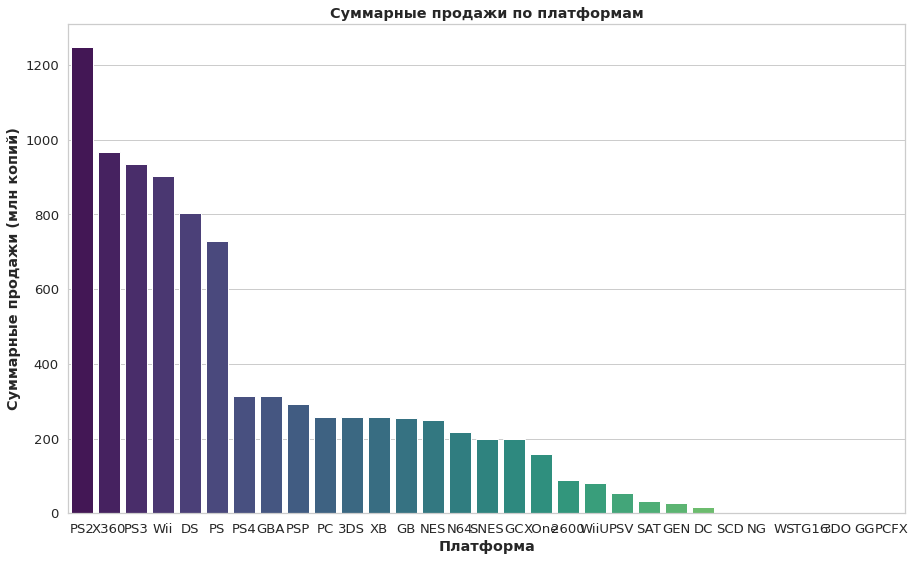

In [28]:
# Посмотрим на суммарные продажи по всем платформам
platform_sales = df.pivot_table(index='platform', 
                                values='total_sales', 
                                aggfunc='sum')

top_platforms = platform_sales.sort_values(by='total_sales', 
                                           ascending=False)

plt.figure(figsize=(15, 9))
sns.barplot(data=top_platforms.reset_index(), 
            x='platform', 
            y='total_sales', 
            palette='viridis')

# Заголовок и метки осей
plt.title('Суммарные продажи по платформам', fontweight='bold')
plt.xlabel('Платформа', fontweight='bold')
plt.ylabel('Суммарные продажи (млн копий)', fontweight='bold')
plt.show()

Исходя из предоставленных данных, можно сделать следующие выводы относительно суммарных продаж на платформах:

На графике явно выделяются 6 лидеров.

- PS2 (1233.56 млн) - Sony
- X360 (961.24 млн) - Microsoft
- PS3 (931.34 млн) - Sony
- Wii (891.18 млн) - Nintendo
- DS (802.76 млн) - Nintendo
- PS (727.58 млн) - Sony

Как видно из списка, платформы принадлежат трём крупнейшим игровым компаниям: Sony, Microsoft и Nintendo, что говорит об их успехе в индустрии видеоигр.

В списке присутствуют как старые, так и новые платформы. Например, PS2 является более старой платформой, в то время как PS4 относительно новая (но уже занимает 7-е место).

Некоторые платформы, такие как PC, имеют стабильные продажи на протяжении многих лет, хотя и не занимают высоких мест в рейтинге.

Многие платформы с низкими продажами, такие как SCD.

### Распределение продаж по годам.

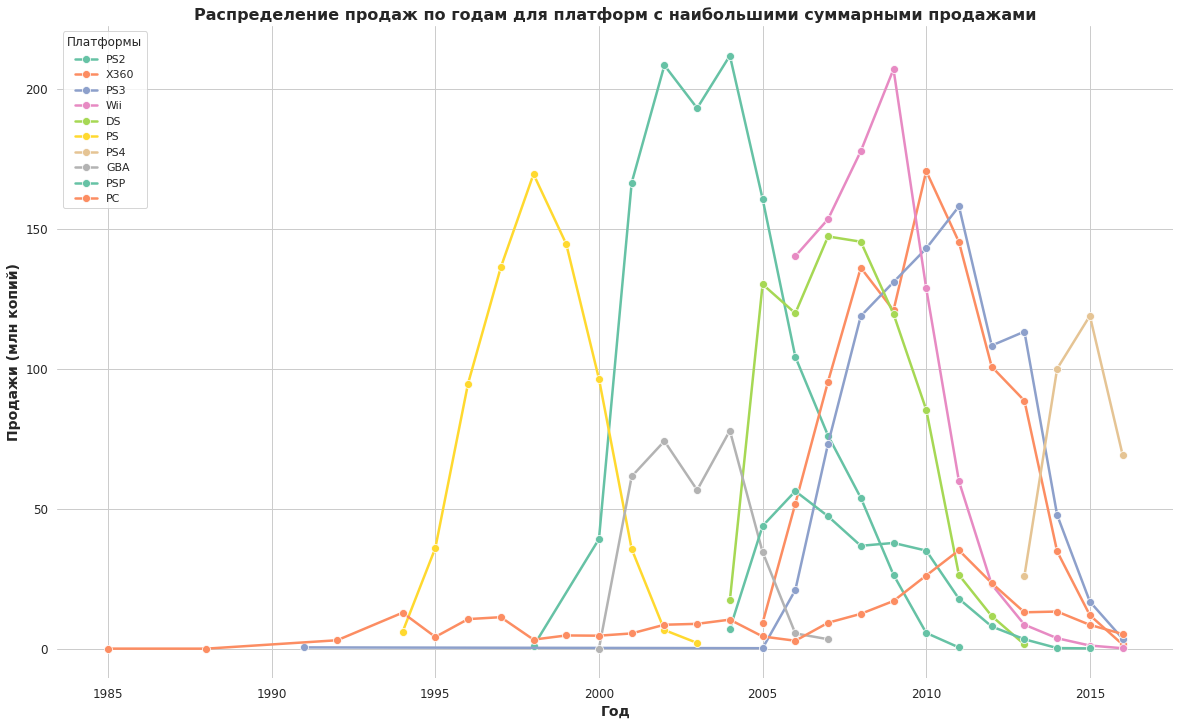

In [29]:
top_platforms_list = top_platforms[0:10].index.tolist()
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid", palette="Set2", color_codes=True)

# Plot цикл
for platform in top_platforms_list:
    platform_data = df[df['platform'] == platform].pivot_table(index='year_of_release', 
                                                               values='total_sales', 
                                                               aggfunc='sum')
    sns.lineplot(data=platform_data, 
                 x=platform_data.index, 
                 y='total_sales', 
                 linewidth=2.5, 
                 marker="o", 
                 markersize=8, 
                 label=platform)
    
# Заголовок и метки осей
plt.title('Распределение продаж по годам для платформ с наибольшими суммарными продажами', 
          fontsize=16, 
          fontweight='bold')

plt.xlabel('Год', fontsize=14, fontweight='bold')
plt.ylabel('Продажи (млн копий)', fontsize=14, fontweight='bold')
plt.legend(title='Платформы', title_fontsize=12, fontsize=11, loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.show()


Анализируя графики, можно заметить, что характерный срок жизни игровой платформы составляет около 10 лет. Обычно, через 5-6 лет после появления платформы, ее продажи достигают пика и затем начинают снижаться, пока платформа не уступит место новым платформам.

### Суммарные продажи по актуальным платформам (2012-2016)

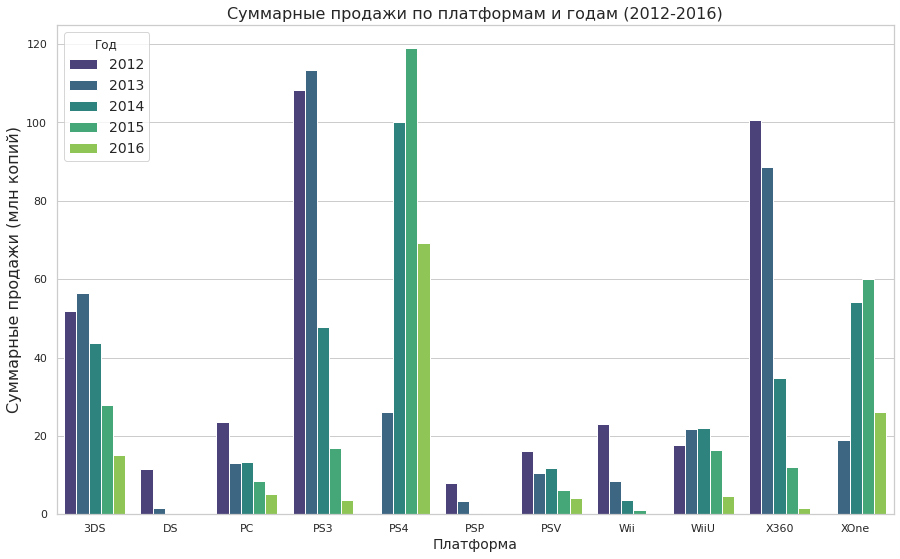

In [30]:
filtered_df =  df[df['year_of_release'] >= 2012]

platform_year_sales = filtered_df.pivot_table(index='platform', 
                                              columns='year_of_release', 
                                              values='total_sales', 
                                              aggfunc='sum')

plt.figure(figsize=(15, 9))
sns.barplot(data=platform_year_sales.reset_index().melt(id_vars=['platform'], 
                                                        var_name='year', 
                                                        value_name='total_sales'), 
                                                        x='platform', 
                                                        y='total_sales', 
                                                        hue='year', 
                                                        palette='viridis')
# Заголовок и метки осей
plt.title('Суммарные продажи по платформам и годам (2012-2016)', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Суммарные продажи (млн копий)', fontsize=16)
plt.legend(title='Год', fontsize=14, loc='upper left')
plt.show()

Основываясь на представленных данных, можно сделать следующие выводы:

- 3DS: Продажи на платформе Nintendo 3DS падают с годами. Вероятная причина - спад популярности портативных консолей из-за роста мобильных игр на смартфонах и планшетах.

- DS: Продажи на платформе Nintendo DS также снижаются, и после 2013 года они прекращаются. Это может быть связано с выходом более новой портативной консоли Nintendo - 3DS.

- PC: Продажи на платформе PC снижаются с 2012 по 2016 год. Это может быть связано с разнообразием платформ и конкуренцией со стороны консолей нового поколения.

- PS3: Продажи на платформе PlayStation 3 достигли пика в 2013 году и затем начали резко снижаться. Это связано с выходом консоли следующего поколения, PlayStation 4, в конце 2013 года.

- PS4: Продажи на платформе PlayStation 4 растут с момента ее выпуска в 2013 году, достигая пика в 2015 году, после чего наблюдается некоторое снижение.

- PSP: Продажи на платформе PlayStation Portable снижаются, и после 2015 года они прекращаются. Это может быть связано с выходом более новой портативной консоли Sony - PlayStation Vita.

- PSV: Продажи на платформе PlayStation Vita снижаются с 2012 по 2016 год. Это также может быть связано со спадом популярности портативных консолей.

- Wii: Продажи на платформе Nintendo Wii снижаются с 2012 по 2016 год. Это может быть связано с выходом новой консоли Nintendo - Wii U.

- WiiU: Продажи на платформе Nintendo Wii U растут с момента выпуска в 2012 году и достигают пика в 2014 году, после чего начинают снижаться.

- X360: Продажи на платформе Xbox 360 достигают пика в 2012 году, после чего начинают резко снижаться. Это связано с выходом консоли следующего поколения, Xbox One, в конце 2013 года.

- XOne: Продажи на платформе XboxOne растут с момента ее выпуска в 2013 году, достигая пика в 2015 году, после чего наблюдается некоторое снижение.

В целом, анализ данных продаж видеоигр по платформам с 2012 по 2016 год показывает, что старые платформы теряют свою популярность, а продажи игр на них снижаются или прекращаются. В то же время, продажи на новых платформах, таких как **PlayStation 4 и Xbox One**, растут с момента их выпуска и достигают пика через несколько лет. Это говорит о том, что аудитория переходит на новые поколения консолей, и разработчики игр также сосредоточивают свои усилия на создании контента для этих новых платформ. Также стоит отметить, что портативные консоли теряют свою популярность из-за роста мобильных игр на смартфонах и планшетах.

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам.

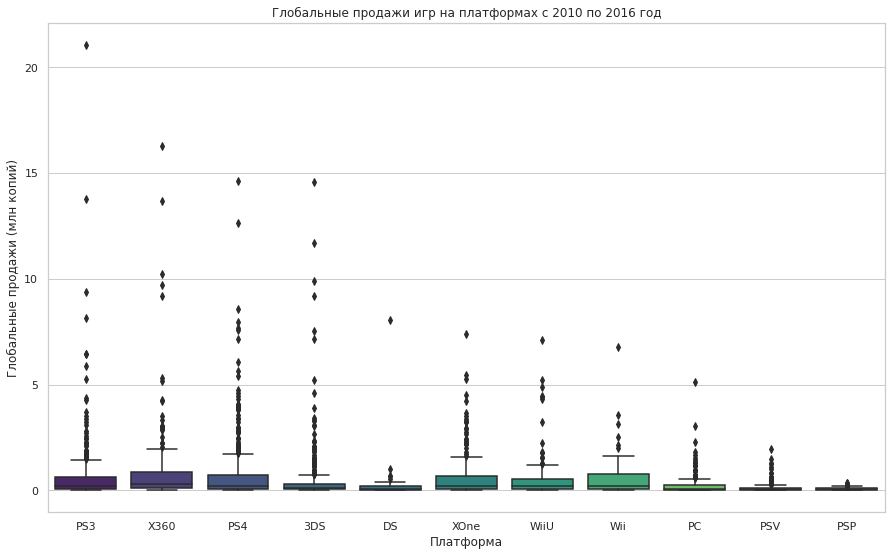

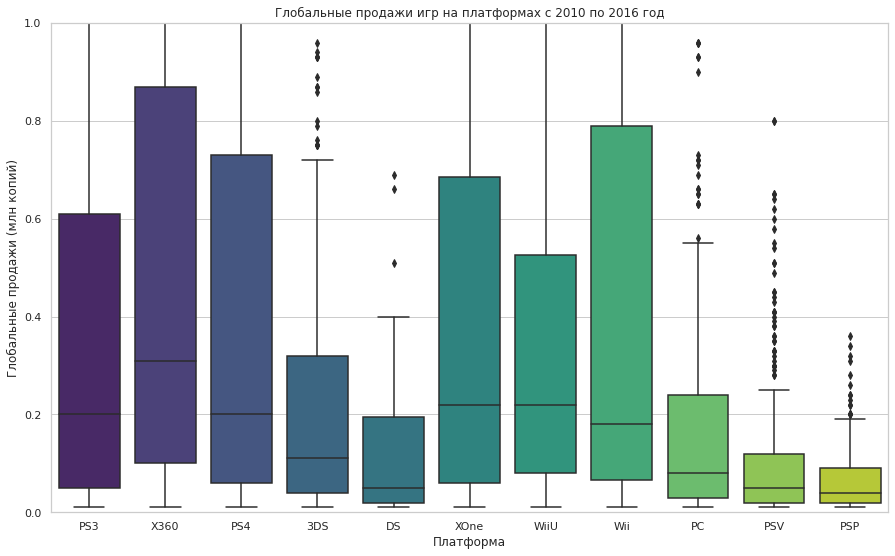


Статистика глобальных продаж для каждой платформы (среднее, медиана, минимум, максимум, Q1 и Q3):
              mean  median   min    max    q1     q3
platform                                            
3DS       0.491209    0.11  0.01  14.60  0.11  0.320
DS        0.412812    0.05  0.01   8.06  0.05  0.195
PC        0.249059    0.08  0.01   5.14  0.08  0.240
PS3       0.586457    0.20  0.01  21.05  0.20  0.610
PS4       0.801378    0.20  0.01  14.63  0.20  0.730
PSP       0.066800    0.04  0.01   0.36  0.04  0.090
PSV       0.119659    0.05  0.01   1.96  0.05  0.120
Wii       0.665455    0.18  0.01   6.76  0.18  0.790
WiiU      0.559116    0.22  0.01   7.09  0.22  0.525
X360      0.807891    0.31  0.01  16.27  0.31  0.870
XOne      0.645020    0.22  0.01   7.39  0.22  0.685


In [31]:
# Отфильтровать данные с 2012 по 2016 год


plt.figure(figsize=(15, 9))

sns.boxplot(data=filtered_df, 
            x='platform', 
            y='total_sales', 
            palette="viridis")

plt.title('Глобальные продажи игр на платформах с 2010 по 2016 год')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')

#plt.ylim(0, 5)

plt.show()

plt.figure(figsize=(15, 9))

sns.boxplot(data=filtered_df, 
            x='platform', 
            y='total_sales', 
            palette="viridis")

plt.title('Глобальные продажи игр на платформах с 2010 по 2016 год')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')

plt.ylim(0, 1)

plt.show()

sales_by_platform_year = filtered_df.pivot_table(index='platform', 
                                                   columns='year_of_release', 
                                                   values='total_sales', 
                                                   aggfunc='sum')

platform_stats = filtered_df.groupby('platform')['total_sales'].agg(
    ['mean', 'median', 'min', 'max', 'quantile']).rename(
    columns={'quantile': 'q1'})
platform_stats['q3'] = filtered_df.groupby('platform')['total_sales'].quantile(0.75)

print("\nСтатистика глобальных продаж для каждой платформы (среднее, медиана, минимум, максимум, Q1 и Q3):")
print(platform_stats)

Средние продажи (mean): Xbox 360 (X360) имеет наибольшее среднее значение продаж (0.808), затем идет PlayStation 4 (PS4) с 0.801. Самое низкое среднее значение у портативной консоли PlayStation Portable (PSP) - 0.067.

Медианные продажи (median): Медианное значение для всех платформ, кроме X360, составляет менее 0.31. Это указывает на то, что продажи игр в большинстве случаев сконцентрированы в нижнем диапазоне.

Минимальные продажи (min): Для всех платформ минимальные продажи составляют 0.01 миллиона копий.

Максимальные продажи (max): PlayStation 3 (PS3) имеет самые высокие максимальные продажи с 21.05 миллионами копий, за ним следует Xbox 360 с 16.27 миллионами копий.

Первый квартиль (Q1) и третий квартиль (Q3): Оценивая Q1 и Q3, можно заметить, что продажи для большинства платформ находятся в нижнем диапазоне. Вероятно, это указывает на наличие большого количества игр с низкими продажами и относительно небольшого числа игр с высокими продажами. Это связано с тем, что некоторые известные игровые франшизы имеют очень высокие продажи, в то время как множество других игр могут иметь низкие продажи.

В целом, данные показывают, что наиболее успешными игровыми платформами в плане средних продаж являются Xbox 360 и PlayStation 4. Однако стоит учитывать, что данные могут меняться с течением времени, поскольку продажи игр на более новых платформах, таких как **PS4 и Xbox One**, продолжают расти.

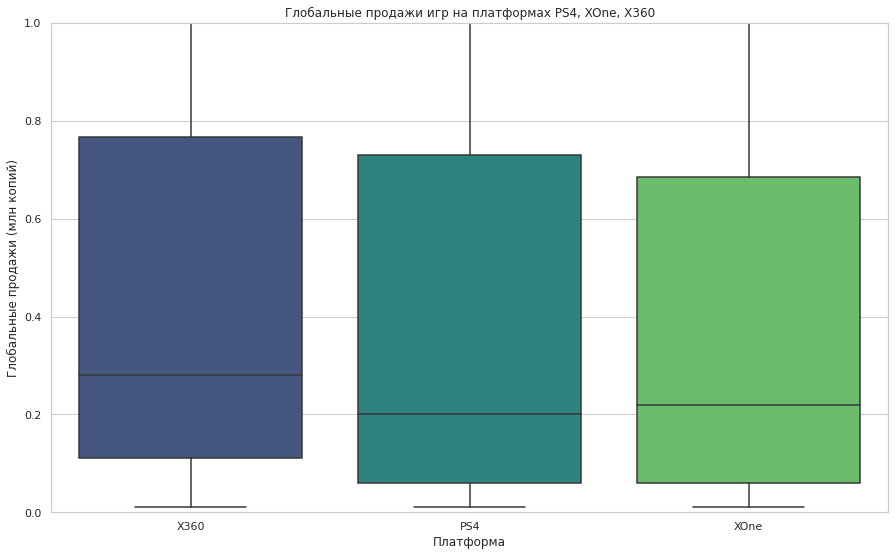

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
X360,1250.0,0.773288,1.621747,0.01,0.11,0.28,0.7675,21.82
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


In [32]:
selected_platforms = df[df['platform'].isin(['PS4', 'XOne', 'X360'])]

plt.figure(figsize=(15, 9))
sns.boxplot(data=selected_platforms, 
            x='platform', 
            y='total_sales', 
            palette="viridis")

plt.title('Глобальные продажи игр на платформах PS4, XOne, X360')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.ylim(0, 1)
plt.show()

stats = selected_platforms.groupby('platform')['total_sales']
stats.describe()

Сравнивая данные по трем платформам, можно сделать следующие выводы:

- X360 имеет самое большое количество игр (1250), что связано с тем, что она является предыдущим поколением консоли от Microsoft и имела больше времени на рынке для выпуска игр.


- PS4 имеет самые высокие средние продажи (0.801 млн копий) среди трех платформ, что свидетельствует о популярности этой платформы среди пользователей и разработчиков игр.


- X360 имеет второе место по средним продажам (0.773 млн копий), что может быть объяснено тем, что она была одной из наиболее популярных платформ своего времени, и многие издатели выпускали игры на этой платформе.


- XOne имеет самые низкие средние продажи (0.645 млн копий), но следует учитывать, что эта платформа имеет меньше игр по сравнению с X360, и это может повлиять на общий уровень продаж.


Стандартное отклонение продаж для всех трех платформ достаточно высокое, что указывает на большой разброс продаж между различными играми на каждой из платформ.

Максимальные продажи на X360 (21.82 млн копий) выше, чем на PS4 (14.63 млн копий) и XOne (7.39 млн копий), что может быть связано с наличием крайне популярных эксклюзивных игр или мультиплатформенных хитов, выпущенных на этой платформе.

В целом, данные показывают различия в продажах игр между тремя платформами. PlayStation 4 демонстрирует самые высокие средние продажи, что указывает на ее успех среди пользователей и разработчиков. Xbox 360 имеет самое большое количество игр и самые высокие максимальные продажи, что связано с ее долгим существованием на рынке и популярностью в прошлом. Наконец, Xbox One имеет самые низкие средние продажи и меньшее количество игр, что может быть связано с меньшей популярностью этой платформы по сравнению с конкурентами.

Основываясь на предоставленных данных, можно сделать вывод, что **наиболее перспективными платформами являются PS4 и XOne**, с PS4 в качестве лидера. Они имеют высокие средние и медианные значения продаж, а также большой разброс между Q1 и Q3, что указывает на наличие множества успешных игр с высокими продажами. Xbox 360 имеет самое большое количество игр и самые высокие максимальные продажи, что связано с ее долгим существованием на рынке и популярностью в прошлом.

### Корреляции продаж и оценок PS4.

Для анализа влияния отзывов пользователей и критиков на продажи внутри платформы PS4, сначала отфильтруем данные по платформе, затем построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона.

Диаграмма рассеяния для PS4


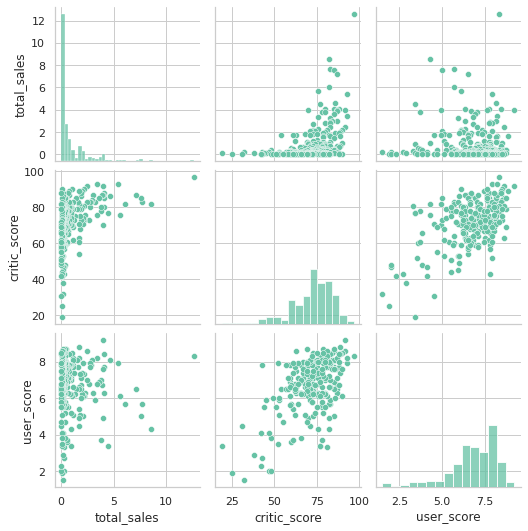

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


In [33]:
print("Диаграмма рассеяния для PS4")

# Отфильтровать строки с оценками, больше 0
filtered_score_df = filtered_df[(filtered_df.platform == "PS4") & (filtered_df.critic_score > 0) & (filtered_df.user_score > 0)]
sns.pairplot(filtered_score_df[['total_sales', 'critic_score', 'user_score']])
plt.show()

print("Матрица корреляций")
filtered_score_df[filtered_score_df.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

На диаграмме рассеяния аблюдается ожидаемая картина: игры с более высоким рейтингом обычно имеют больше продаж, поскольку они лучше. Однако, есть и отклонения от этой тенденции - в столбце `user_score` присутствуют игры, которые получили высокие оценки от пользователей, но имели небольшое количество продаж.


- Корреляция между `total_sales` и `critic_score` равна 0.4, что ожидаемо, мы углядели эту зависимость на графике.
- Корреляции между `total_sales` и `user_score` нет.

### Корреляции продаж и оценок самых прибыльных платформ.

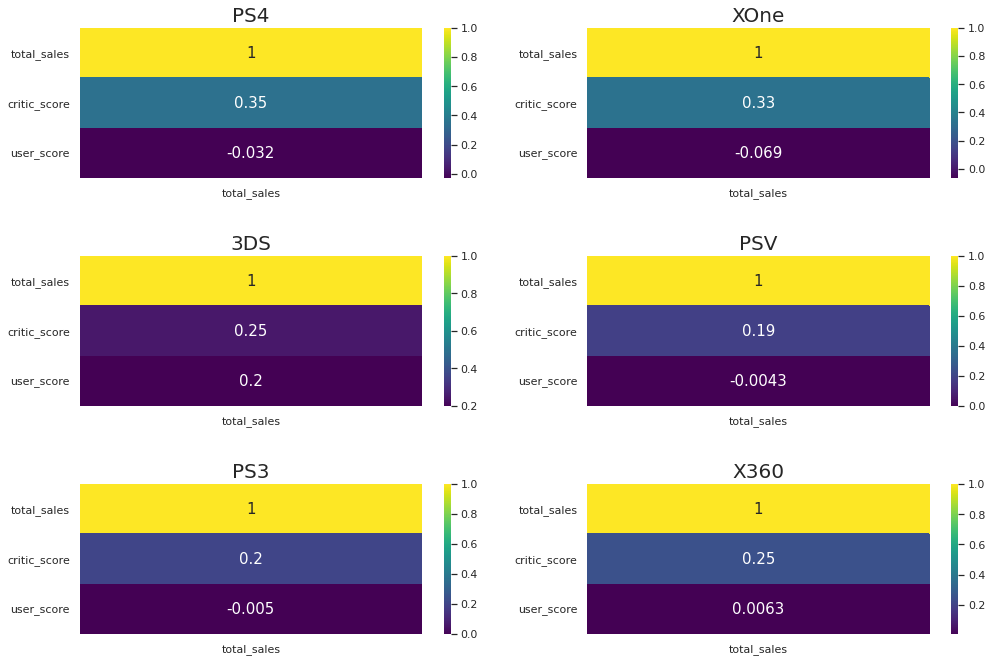

In [34]:
top_platforms = ['PS4', 'XOne', '3DS', 'PSV', 'PS3', 'X360']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = filtered_df[(filtered_df['platform'] == curr_platform) & (filtered_df['user_score'] > 0)].copy()

        df_filtered = df_prep[['total_sales', 'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False),
                         cmap="viridis", annot=True, annot_kws={'size': 15}, ax=axes[r, c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

plt.show()


- По убыванию корреляции(оценка критиков) -> PS4 / XOne/PS3/X360/3DS/PSV

- По убыванию корреляции(оценка пользователей) -> почти нет связи, за исключением 3DS.

### Распределение глобальных продаж игр по жанрам.

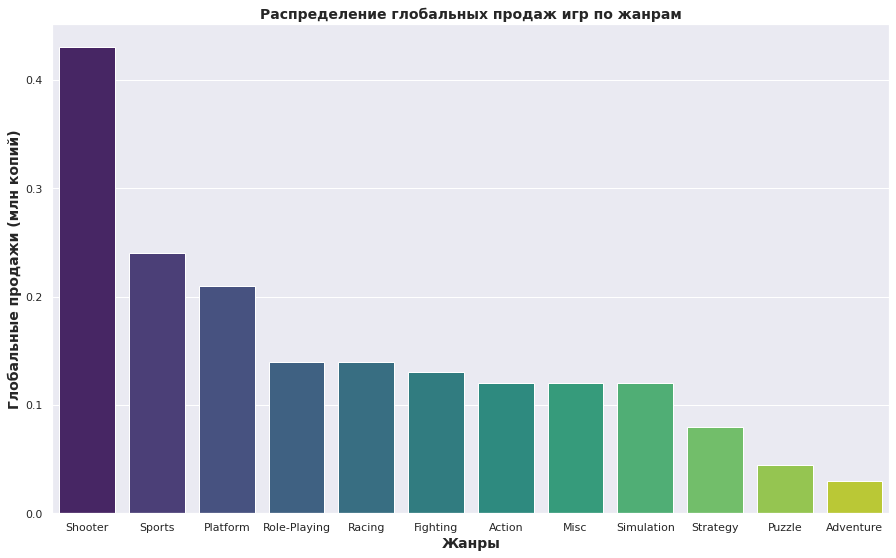

In [35]:
plt.figure(figsize=(15, 9))

genre_sales = filtered_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')

plt.title('Распределение глобальных продаж игр по жанрам', fontsize = 14, fontweight='bold')
plt.xlabel('Жанры', fontsize = 14, fontweight='bold')
plt.ylabel('Глобальные продажи (млн копий)', fontsize = 14, fontweight='bold')

plt.show()



In [36]:
genre_sales

genre
Shooter         0.430
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

На основе медианных значений продаж по разным жанрам игр в млн копий, можно сделать следующие выводы:

- Жанр "Shooter" является самым популярным жанром, с медианными продажами в 0.430 млн копий. Это может быть связано с тем, что стрелялки обычно предлагают динамичный игровой процесс и захватывающие сюжеты, что привлекает большое количество игроков.


- Спортивные игры занимают второе место по популярности, с медианными продажами в 0.240 млн копий. Они предлагают разнообразие симуляторов различных видов спорта, что может привлекать широкую аудиторию пользователей.


- Платформеры занимают третье место по популярности с медианными продажами в 0.210 млн копий. Игры в этом жанре обычно характеризуются уникальным геймплеем и разнообразием миров, что может быть привлекательным для игроков.


- Жанры "Role-Playing", "Racing", "Fighting", "Action", "Misc", "Simulation", "Strategy", "Puzzle" и "Adventure" имеют меньшие медианные продажи, что может быть связано с тем, что они обращены к более специфическим аудиториям или имеют меньшую базу поклонников.


- Приключенческие игры имеют наименьшие медианные продажи (0.030 млн копий). Это может быть связано с тем, что жанр приключений часто включает меньше действия и более медленный игровой процесс, что может быть менее привлекательным для большой аудитории игроков.


- В целом, данные показывают, что жанры "Shooter", "Sports" и "Platform" являются наиболее популярными среди игроков, в то время как остальные жанры имеют меньшие медианные продажи.

### Вывод по разделу.

**Вывод по разделу:**


Игровая индустрия активно развивалась с 1993 по 2010 год, после чего количество выпускаемых игр снизилось и стабилизировалось. Лидерами рынка являются игровые платформы от Sony, Microsoft и Nintendo, с характерным сроком жизни платформы около 10 лет. PS4 и XOne являются наиболее потенциально прибыльными платформами на данный момент, с PS4 в качестве лидера. Они имеют высокие средние и медианные значения продаж, а также большой разброс между Q1 и Q3. Платформа 3DS также показывает хорошие результаты, но ее средние и медианные значения продаж ниже, чем у PS4 и XOne. Продажи на всех платформах снижаются, что может указывать на общее снижение интереса к игровым консолям или ожидание новых платформ.


Основываясь на медианных значениях продаж по жанрам, можно сделать вывод, что наиболее популярными являются "Shooter", "Sports" и "Platform". Это связано с динамичным игровым процессом, захватывающими сюжетами и разнообразием миров. Жанры с меньшими медианными продажами, такие как "Role-Playing", "Racing", "Fighting", "Action", "Misc", "Simulation", "Strategy", "Puzzle" и "Adventure", имеют более специфическую аудиторию или меньшую базу поклонников. Наименьшие медианные продажи у приключенческих игр, что может быть связано с меньшим количеством действия и более медленным игровым процессом.

На диаграмме рассеяния наблюдается ожидаемая картина: игры с более высоким рейтингом обычно имеют больше продаж, поскольку они лучше. Однако, есть и отклонения от этой тенденции, например, игры с высокими оценками пользователей, но небольшим количеством продаж. Корреляция между общими продажами и оценками критиков составляет 0.4, что подтверждает зависимость между этими переменными, в то время как между общими продажами и оценками пользователей корреляция отсутствует.


Таким образом, основываясь на проведеном анализе, можно сделать вывод, что для успешных продаж игр стоит сосредоточиться на платформах PS4 и XOne, а также разрабатывать игры в жанрах Action, Sports и Shooter. Игры с высокими оценками критиков также имеют больший потенциал для успешных продаж, поскольку хороший рейтинг может привлечь больше внимания игроков. Однако, стоит учесть, что рейтинг пользователей не всегда коррелирует с продажами, и некоторые игры с высокими оценками пользователей могут иметь небольшие продажи.

## Составить портрет пользователя каждого региона.


Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5), опишем различия в долях продаж;
- Самые популярные жанры (топ-5), поясним разницу;
- Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Топ-5 платформ по продажам в каждом регионе.

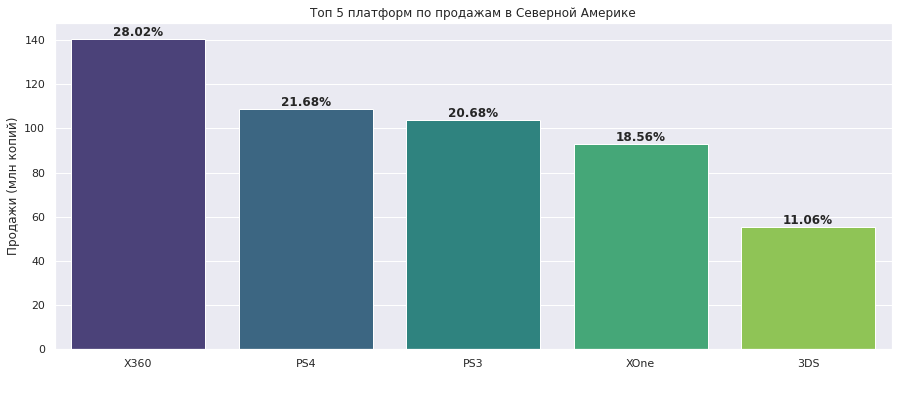

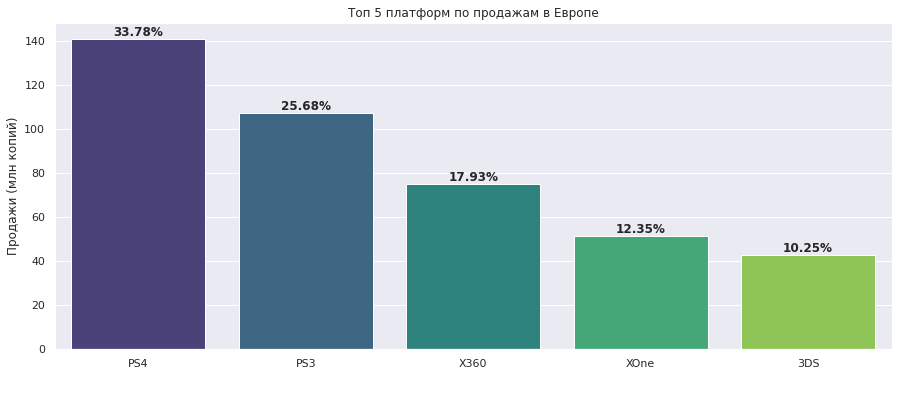

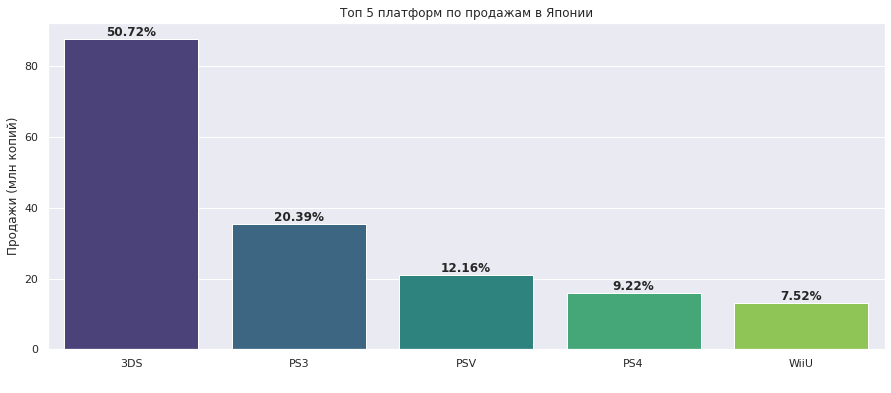

In [37]:
platform_sales = filtered_df.groupby('platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

# Находим топ-5 платформ для каждого региона
top5_na = platform_sales.nlargest(5, 'na_sales')['na_sales']
top5_eu = platform_sales.nlargest(5, 'eu_sales')['eu_sales']
top5_jp = platform_sales.nlargest(5, 'jp_sales')['jp_sales']

# Функция для создания графика
def plot_top_platforms(region_name, top_platforms, title):
    plt.figure(figsize=(15, 6))
    ax = sns.barplot(x=top_platforms.index, y=top_platforms.values, palette='viridis')
    plt.title(title)
    plt.xlabel(' ')
    plt.ylabel('Продажи (млн копий)')
    # Преобразуем значения на оси y в проценты и добавляем соответствующие метки
    totals = float(sum(top_platforms.values))
    for i, val in enumerate(top_platforms.values):
        ax.text(i, val, f'{(val/totals)*100:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.show()

# Рисуем график для региона NA
plot_top_platforms('NA', top5_na, 'Топ 5 платформ по продажам в Северной Америке')

# Рисуем график для региона EU
plot_top_platforms('EU', top5_eu, 'Топ 5 платформ по продажам в Европе')

# Рисуем график для региона JP
plot_top_platforms('JP', top5_jp, 'Топ 5 платформ по продажам в Японии')



**Сравнение топ 5 платформ между регионами:**

- Северная Америка:
Xbox 360 (X360) является самой популярной платформой с продажами в 140.57 млн копий.
PlayStation 4 (PS4) занимает второе место с 108.74 млн копий.
PlayStation 3 (PS3) на третьем месте с 103.74 млн копий.
Xbox One (XOne) и Nintendo 3DS (3DS) замыкают топ-5 с продажами в 93.12 млн и 55.49 млн копий соответственно.

- Европа:
PlayStation 4 (PS4) лидирует с продажами в 141.09 млн копий.
PlayStation 3 (PS3) на втором месте с 107.27 млн копий.
Xbox 360 (X360) следует за ними с 74.89 млн копий.
Xbox One (XOne) и Nintendo 3DS (3DS) также входят в топ-5 с продажами в 51.59 млн и 42.83 млн копий соответственно.

- Япония:
Nintendo 3DS (3DS) является самой популярной платформой с продажами в 87.79 млн копий.
PlayStation 3 (PS3) занимает второе место с 35.29 млн копий.
PlayStation Vita (PSV) находится на третьем месте с 21.04 млн копий.
PlayStation 4 (PS4) и Wii U (WiiU) также входят в топ-5 с продажами в 15.96 млн и 13.01 млн копий соответственно.


Рынок видеоигр варьируется в зависимости от региона. В Северной Америке и Европе Xbox 360, PlayStation 3 и PlayStation 4 являются наиболее популярными платформами, однако распределение продаж между ними отличается. В Японии предпочтения пользователей существенно отличаются от других регионов, с доминированием портативных платформ, таких как Nintendo 3DS, PlayStation 3 и PlayStation Vita.

### Топ-5 жанров по продажам в каждом регионе.

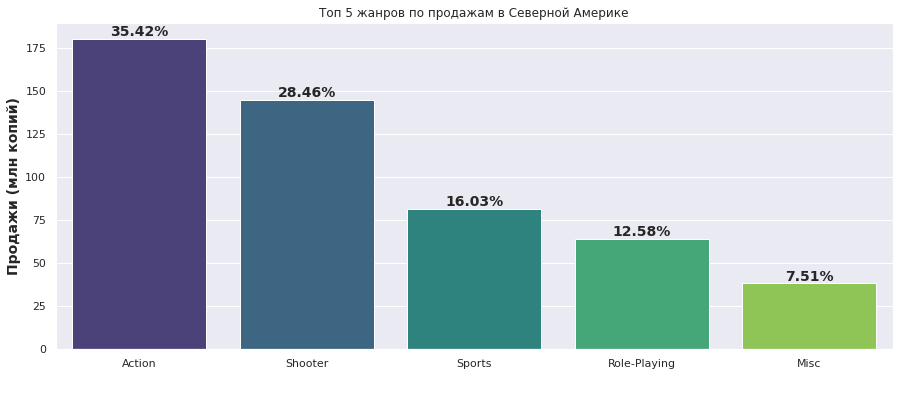

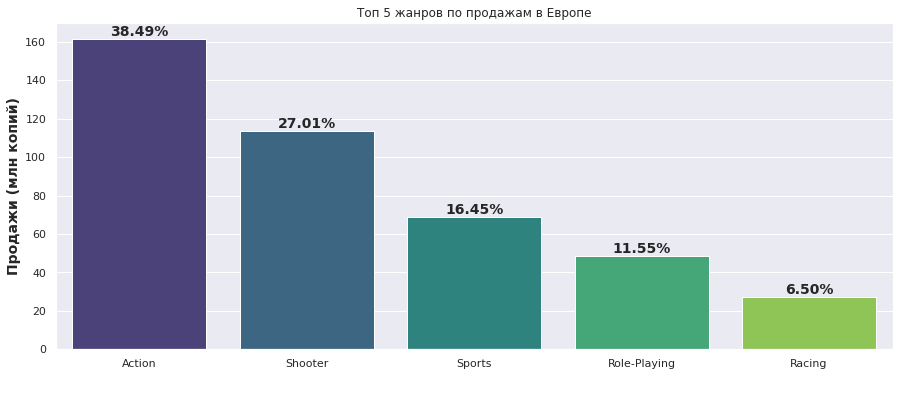

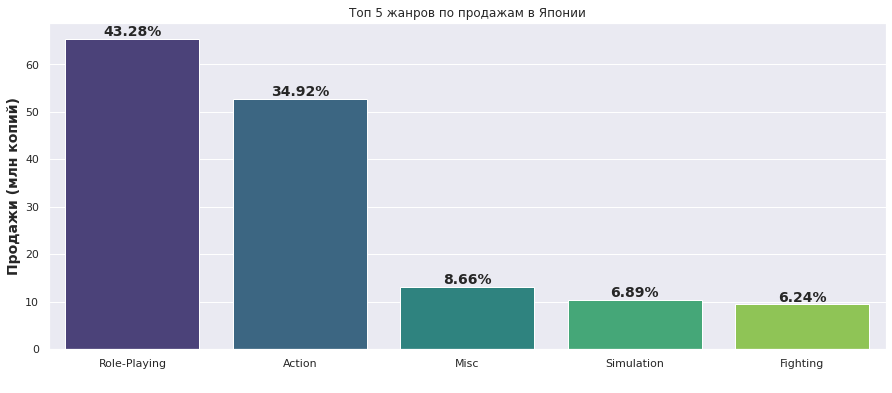

In [38]:
genre_sales = filtered_df.groupby('genre').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

# Находим топ-5 платформ для каждого региона
top5g_na = genre_sales.nlargest(5, 'na_sales')['na_sales']
top5g_eu = genre_sales.nlargest(5, 'eu_sales')['eu_sales']
top5g_jp = genre_sales.nlargest(5, 'jp_sales')['jp_sales']

# Функция для создания графика
def plot_top_platforms(region_name, top_platforms, title):
    plt.figure(figsize=(15, 6))
    ax = sns.barplot(x=top_platforms.index, y=top_platforms.values, palette='viridis')
    plt.title(title)
    plt.xlabel(' ')
    plt.ylabel('Продажи (млн копий)', fontsize=14, fontweight='bold')
    # Преобразуем значения на оси y в проценты и добавляем соответствующие метки
    totals = float(sum(top_platforms.values))
    for i, val in enumerate(top_platforms.values):
        ax.text(i, val, f'{(val/totals)*100:.2f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')
    plt.show()

# Рисуем график для региона NA
plot_top_platforms('NA', top5g_na, 'Топ 5 жанров по продажам в Северной Америке')

# Рисуем график для региона EU
plot_top_platforms('EU', top5g_eu, 'Топ 5 жанров по продажам в Европе')

# Рисуем график для региона JP
plot_top_platforms('JP', top5g_jp, 'Топ 5 жанров по продажам в Японии')


**Сравнение топ 5 жанров между регионами:**


- Северная Америка:

Action (180.15 млн копий)
Shooter (144.79 млн копий)
Sports (81.53 млн копий)
Role-Playing (64.00 млн копий)
Misc (38.19 млн копий)


- Европа:

Action (161.70 млн копий)
Shooter (113.47 млн копий)
Sports (69.09 млн копий)
Role-Playing (48.53 млн копий)
Racing (27.29 млн копий)


- Япония:

Role-Playing (65.44 млн копий)
Action (52.80 млн копий)
Misc (13.10 млн копий)
Simulation (10.41 млн копий)
Fighting (9.44 млн копий)



В Северной Америке и Европе жанры Action, Shooter и Sports являются самыми популярными, тогда как в Японии лидирует жанр Role-Playing. Во всех трех регионах жанр Action занимает высокое место. При этом в Японии в топ-5 также входят жанры Misc, Simulation и Fighting, которые не так популярны в других регионах. Разработчикам и продавцам игр стоит учитывать эти различия в предпочтениях жанров для разных регионов, чтобы оптимизировать продажи и удовлетворить интересы игроков.

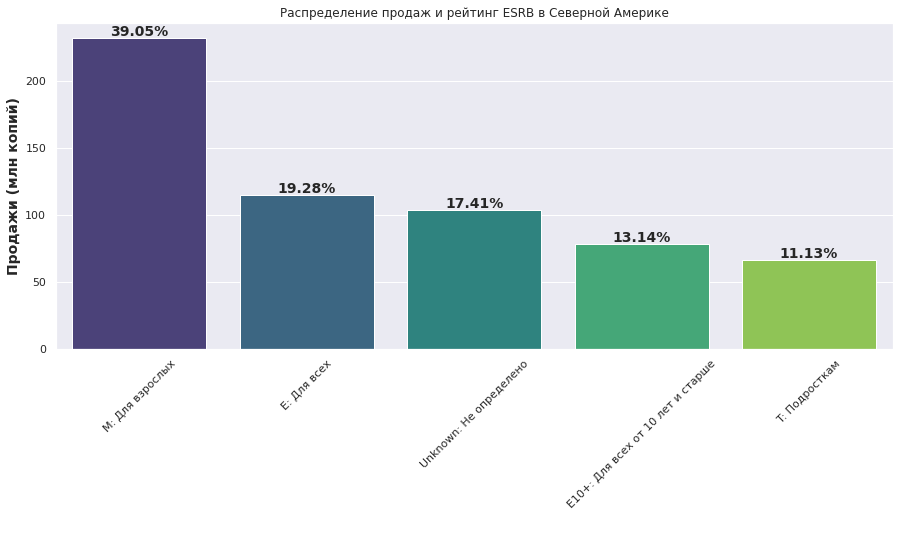

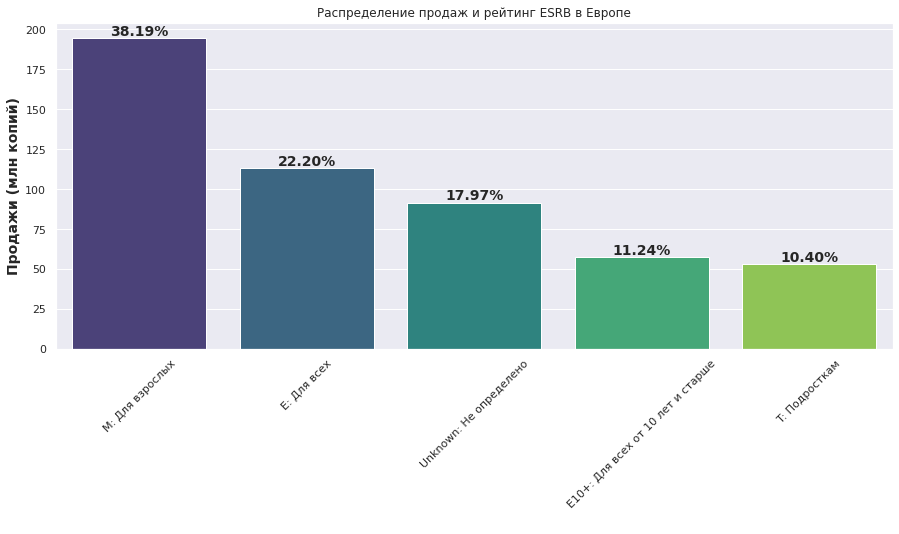

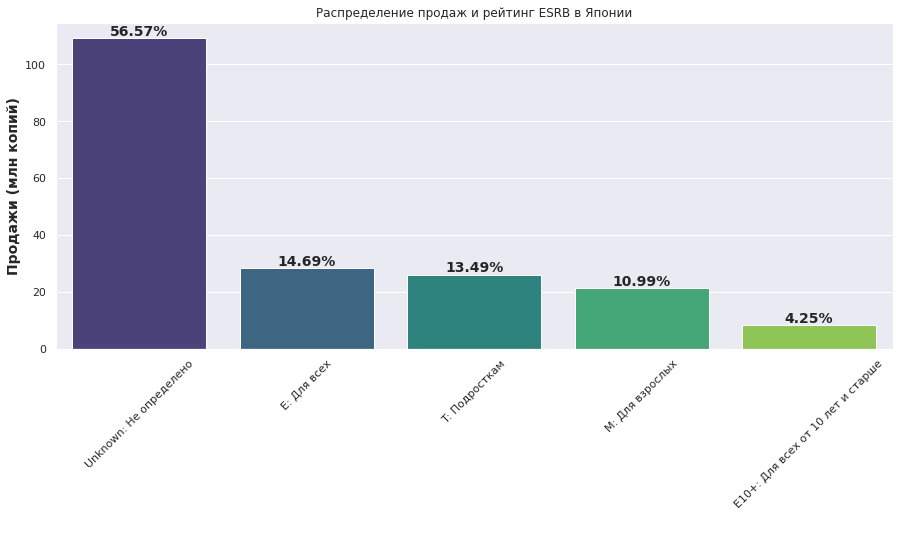

In [39]:
rating_sales = filtered_df.groupby('rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

top10_na = rating_sales.nlargest(10, 'na_sales')['na_sales']
top10_eu = rating_sales.nlargest(10, 'eu_sales')['eu_sales']
top10_jp = rating_sales.nlargest(10, 'jp_sales')['jp_sales']

# Функция для создания графика
def plot_top_platforms(region_name, top_platforms, title):
    plt.figure(figsize=(15, 6))
    
    esrb_ratings = {
        'EC': 'Для детей младшего возраста',
        'E': 'Для всех',
        'E10+': 'Для всех от 10 лет и старше',
        'T': 'Подросткам',
        'M': 'Для взрослых',
        'RP': 'Рейтинг ожидается',
        'Unknown': 'Не определено'
    }

    # Обновляем названия колонок
    updated_columns = [f'{col}: {esrb_ratings[col]}' if col in esrb_ratings else col for col in top_platforms.index]

    ax = sns.barplot(x=updated_columns, y=top_platforms.values, palette='viridis')
    plt.title(title)
    plt.xlabel(' ')
    plt.ylabel('Продажи (млн копий)', fontsize=14, fontweight='bold')

    # Преобразуем значения на оси y в проценты и добавляем соответствующие метки
    totals = float(sum(top_platforms.values))
    for i, val in enumerate(top_platforms.values):
        ax.text(i, val, f'{(val/totals)*100:.2f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

# Рисуем график для региона NA
plot_top_platforms('NA', top10_na, 'Распределение продаж и рейтинг ESRB в Северной Америке')

# Рисуем график для региона EU
plot_top_platforms('EU', top10_eu, 'Распределение продаж и рейтинг ESRB в Европе')

# Рисуем график для региона JP
plot_top_platforms('JP', top10_jp, 'Распределение продаж и рейтинг ESRB в Японии')


**Общий вывод по всем регионам:**

- Игры с рейтингом «M» (для взрослых) являются самыми продаваемыми в Северной Америке и Европе, в то время как в Японии они занимают четвертое место. Это может говорить о различиях в предпочтениях игрового контента между Западом и Востоком.


- Игры с рейтингом «E» (для всех) стабильно популярны во всех трех регионах, занимая второе место в Северной Америке и Европе и второе место в Японии. Это говорит о высоком спросе на игры, которые доступны широкой аудитории.


- Игры с рейтингом «T» (для подростков) и «E10+» (для всех старше 10 лет) имеют схожие продажи в Северной Америке и Европе. В Японии игры с рейтингом «T» занимают третье место, в то время как игры с рейтингом «E10+» имеют существенно меньшие продажи, занимая пятое место.


- Игры без определенного рейтинга (Unknown) имеют значительные продажи во всех регионах, особенно в Японии, где они занимают первое место. Это может указывать на то, что множество игр на японском рынке не проходят стандартную процедуру рейтинга ESRB или что сведения о рейтинге неполные.


- Игры с рейтингом «EC» (для детей младшего возраста) имеют минимальные продажи в Северной Америке и отсутствуют на рынках Европы и Японии. Это может быть связано с ограниченной целевой аудиторией таких игр или малым количеством выпущенных игр с данным рейтингом.


В целом, различия в распределении продаж по рейтингам ESRB между регионами могут быть связаны с культурными особенностями, предпочтениями игроков и различиями в доступности игр. Во всех регионах важным фактором является предоставление игр, которые доступны широкой аудитории, включая игры с рейтингами «E», «T» и «E10+». Однако, игры с рейтингом «M» (для взрослых) также имеют большой успех, особенно в Северной Америке и Европе, что может говорить о значительном спросе на игры с более зрелым и сложным контентом в этих регионах.


Сравнивая регионы между собой, можно заметить, что Япония отличается от Северной Америки и Европы в плане предпочтений рейтингов. Это может быть связано с тем, что японский рынок игр обладает своей уникальной культурой и традициями, что влияет на то, какие виды игр наиболее популярны среди местных игроков. Возможно, японские игроки предпочитают игры с японскими разработчиками, которые могут не всегда подходить под стандартные рейтинги ESRB.

## Проверка гипотиз.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.


Для проверки гипотезы мы можем использовать t-критерий Стьюдента для независимых выборок, так как это позволит сравнить средние двух независимых групп (в нашем случае, пользовательские рейтинги для Xbox One и PC).

In [40]:
alpha = 0.05

t_stat, p_value = st.ttest_ind(filtered_df.query('platform == "XOne" and user_score > 0')['user_score'],
                               filtered_df.query('platform == "PC" and user_score > 0')['user_score'])

print(f"t-статистика: {t_stat:.5f}")
print(f"p-значение: {p_value:.5f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")


t-статистика: 0.48877
p-значение: 0.62528
Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


На основе проведенного t-теста для сравнения средних пользовательских рейтингов платформ Xbox One и PC, можно сделать следующие выводы:

- Полученная t-статистика составляет 0.48877, а p-значение — 0.62528.


- Значение p-vaule больше заданного уровня значимости (alpha = 0.05), что означает, что нет оснований отвергнуть нулевую гипотезу.


- Таким образом, на основе имеющихся данных, мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются. Следовательно, можно предположить, что пользователи оценивают игры на этих платформах примерно одинаково.


Эти результаты могут быть полезными для разработчиков игр и издателей, которые хотят определить, какие платформы предпочитают пользователи с точки зрения удовлетворенности от игрового опыта.

### Средние пользовательские рейтинги жанров Action  и Sports разные.

In [41]:
alpha = 0.05

t_stat, p_value = st.ttest_ind(filtered_df.query('genre == "Action" and user_score > 0')['user_score'], 
                               filtered_df.query('genre == "Sports" and user_score > 0')['user_score'])

print(f"t-статистика: {t_stat:.5f}")
print(f"p-значение: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.")

t-статистика: 11.12950
p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.


На основе проведенного t-теста для сравнения средних пользовательских рейтингов жанров Action и Sports, можно сделать следующие выводы:

- Полученная t-статистика составляет 11.12950, а p-значение — 1.14056e-26 (очень маленькое значение, близкое к нулю).


- Значение p-значения намного меньше заданного уровня значимости (alpha = 0.05), что означает, что есть основания отвергнуть нулевую гипотезу.


- Таким образом, на основе имеющихся данных, можно утверждать, что средние пользовательские рейтинги жанров Action и Sports различаются.

Эти результаты могут быть полезными для разработчиков игр и издателей, которые хотят лучше понять предпочтения пользователей в отношении разных жанров игр. Различия в пользовательских рейтингах между жанрами Action и Sports могут указывать на то, что игроки оценивают эти жанры по-разному и ищут разные аспекты в играх каждого жанра.

## Общий вывод.

С 1980-х годов видеоигры становятся все более популярными, а количество выпускаемых игр увеличивается. Пик выпуска игр приходится на 2007-2010 гг. с выходом новых консолей. С 2011 года количество выпускаемых игр снижается, возможно, из-за насыщения рынка и перехода на мобильные платформы. В период 2014-2016 гг. количество выпущенных игр стабилизируется на низком уровне, что может быть связано с адаптацией индустрии к новым тенденциям, включая мобильные игры и связанные с ними финансовые модели.

Суммируя данные по общим продажам на платформах, можно выделить 6 лидеров, принадлежащих компаниям Sony, Microsoft и Nintendo. В списке есть как старые, так и новые платформы. Платформы с низкими продажами не занимают значительной доли рынка. В целом, лидеры рынка определяют успех индустрии видеоигр.


Анализируя графики, можно заметить, что характерный срок жизни игровой платформы составляет около 10 лет. Обычно, через 5-6 лет после появления платформы, ее продажи достигают пика и затем начинают снижаться, пока платформа не уступит место новым платформам.

Продажи на старых платформах снижаются, а на новых, таких как PS4 и Xbox One, растут. Портативные консоли теряют популярность из-за роста мобильных игр. Анализ продаж видеоигр показывает, что наиболее успешными платформами в плане средних продаж являются Xbox 360 и PlayStation 4. Однако новые платформы, такие как PS4 и Xbox One, продолжают расти, что может изменить текущие данные в будущем.

Жанры "Shooter", "Sports" и "Platform" являются наиболее популярными среди игроков, с высокими медианными продажами. Остальные жанры, такие как "Role-Playing", "Racing", "Fighting", "Action", "Misc", "Simulation", "Strategy", "Puzzle" и "Adventure", имеют меньшие медианные продажи, что может быть связано с более специфической аудиторией или меньшей базой поклонников.

Рынок видеоигр отличается в разных регионах. В Северной Америке наиболее популярными платформами являются Xbox 360, PlayStation 4 и PlayStation 3, при этом Xbox 360 занимает лидирующую позицию. В Европе лидирует PlayStation 4, а Xbox 360 и PlayStation 3 также пользуются большим спросом. В Японии ситуация существенно отличается: здесь доминируют портативные платформы, такие как Nintendo 3DS, PlayStation 3 и PlayStation Vita. Таким образом, при планировании продаж видеоигр важно учитывать региональные предпочтения пользователей и специфику рынка.



**Топ-5 жанров по регионам:**

- Северная Америка: Action, Shooter, Sports, Role-Playing, Misc.
- Европа: Action, Shooter, Sports, Role-Playing, Racing.
- Япония: Role-Playing, Action, Misc, Simulation, Fighting.


Жанр Action популярен во всех регионах. В Северной Америке и Европе также популярны Shooter и Sports, в то время как в Японии доминирует Role-Playing. Жанры Misc, Simulation и Fighting входят в топ-5 только в Японии. Учитывая различия в предпочтениях жанров между регионами, разработчикам и продавцам игр важно принимать во внимание региональные особенности для оптимизации продаж и удовлетворения интересов игроков.


++В ходе анализа данных о продажах видеоигр были сделаны следующие выводы:

**Предпочтения в платформах и жанрах игр различаются между регионами.**


**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**


**Средние пользовательские рейтинги жанров Action и Sports различаются.**

Анализ пользовательских рейтингов платформ и жанров игр показывает, что нет статистически значимых различий в рейтингах между платформами Xbox One и PC, что указывает на схожесть удовлетворенности игроков от игрового опыта на этих платформах. В то же время, средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются, что свидетельствует о разных предпочтениях игроков и возможных различиях в ожиданиях от игр этих жанров.

Для разработчиков и издателей эти результаты могут быть полезными для принятия решений о разработке и продвижении игр, а также для учета потребностей и предпочтений разных аудиторий в разных жанрах и платформах.




Потенциально прибыльные платформы и жанры:
- Платформы: PC4, XOne.
- Жанры: "Shooter", "Sports" и "Platform".


Портрет пользователя для каждого региона:
Северная Америка:

- Популярные платформы: X360, PS4, PS3, XOne, 3DS.
- Популярные жанры:  Action, Shooter, Sports, Role-Playing, Misc.
- Рейтинги: M, E, T, E10+.

Европа:
- Популярные платформы: PS4, PS3, X360, XOne, 3DS.
- Популярные жанры:  Action, Shooter, Sports, Role-Playing, Racing.
- Рейтинги: M, E, T, E10+.


Япония:

- Популярные платформы: 3DS, PS3, PS4, PSV, WiiU.
- Популярные жанры: Role-Playing, Action, Misc, Simulation, Fighting.
- Рейтинги: M, E, T, E10+, Unknown,



Для успешных продаж и удовлетворения интересов игроков в разных регионах, необходимо учитывать региональные предпочтения в платформах, жанрах и рейтингах, особенно учитывая различия между Японией и Западом. Рекомендации: сосредоточиться на новых платформах (PS4, Xbox One), снизить акцент на портативных консолях, следить за тенденциями в жанрах и предлагать востребованные игры (например, "Shooter", "Sports", "Platform"). 
- Предоставляйте подробную информацию о жанре, игровых особенностях и платформе для каждой игры на вашем сайте, чтобы облегчить пользователям выбор подходящей игры.


- Регулярно обновляйте ассортимент игр в магазине, следя за новыми релизами, популярными франшизами и трендами в игровой индустрии, чтобы привлечь и удержать внимание покупателей.


- Разрабатывайте и предлагайте акции, скидки и специальные предложения, ориентированные на самые популярные платформы и жанры, чтобы привлечь больше клиентов и стимулировать продажи.